# Concepts

**Bias** - How far predictions are from the real answer.

**Variance** - How scattered (spread) predictions are.

Often we are faced with a balancing act between overfitting and underfitting but ultimately we want to reduce error 

**Overfitting (high bias)** - Model adheres to train data too well producing very high accuracy on test data but can't predict new values very well.

**Underfitting (high variance)** - Model can't predict training data and presents low accuracy.

k-fold cross-validation
Cross-Validation is an improved training technique of train-test and reduces the amount of overfitting by:
- Splitting data into cv randomly assigned segments
- Reserving one segment as the test data
- Training each segment and comparing against the test segment

**Normalisation** - Some models require normalised inputs but this can introduce bias.

**Outliers** - May be ok to remove to reduce overfitting. Standard deviation provides a standard way of identifying significant outliers.

# Data Processing

In [1]:
import pandas as pd
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

from sklearn.model_selection import cross_val_score

### Mammogram Dataset

We begin by importing the mammogram data as a dataframe, replacing '?' with NaN

In [2]:
mammogram_df = pd.read_csv('mammographic_masses.data.txt', header=0, names=['BI-RADS', 'Age', 'Shape', 'Margin', 'Density', 'Severity'], na_values=['?'])
mammogram_df.head()

,BI-RADS,Age,Shape,Margin,Density,Severity
0,4.0,43.0,1.0,1.0,NaN,1
1,5.0,58.0,4.0,5.0,3.0,1
2,4.0,28.0,1.0,1.0,3.0,0
3,5.0,74.0,1.0,5.0,NaN,1
4,4.0,65.0,1.0,NaN,3.0,0


Off the bat we can see there are missing data points. Lets see the extent of the damage

In [3]:
mammogram_df.describe()

,BI-RADS,Age,Shape,Margin,Density,Severity
count,958.000000,955.000000,929.000000,912.000000,884.000000,960.000000
mean,4.347599,55.475393,2.721206,2.793860,2.910633,0.462500
std,1.783838,14.482917,1.243428,1.565702,0.380647,0.498852
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


We can see by the count that there are a number of missing data points, especially on the density column.

In [4]:
mammogram_df.dropna(inplace=True)

We want to be careful that we don't introduce bias by simply dropping values! Alternatively, we can interpolate using the mean (or KNN or a Neural Network) but this will still add some bias

In [5]:
mammogram_df.describe()

,BI-RADS,Age,Shape,Margin,Density,Severity
count,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000
mean,4.393245,55.768396,2.781665,2.810615,2.915561,0.484922
std,1.889394,14.675456,1.243088,1.566276,0.351136,0.500074
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


The standard deviation of NaN removed data set is similar to the standard deviation of the entire data set, specifically on the Density column which had the most number of missing data points. Suggests that we won't introduce bias by simply dropping the rows with incomplete data. The count is also identical across all features so the dataset should be nice and clean.

Lets break the data set into Numpy features and labels for later consumption

BI-RADS (col 0) is an assesment of how confident the severity classification is; it is not a "predictive" attribute and so we will discard it.

In [6]:
mammogram_features = mammogram_df.columns[1:-1]
mammogram_x = mammogram_df[mammogram_features].values
mammogram_y = mammogram_df['Severity'].values

Since some models require normalised features (like neural nets), we should go ahead and prepare that now

In [7]:
mammogram_x_scaled = scaler.fit_transform(mammogram_x)

### Iris Dataset

In [8]:
from sklearn.datasets import load_iris

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


This dataset looks clean and ready to use. Lets extract the features and labels into Numpy arrays and created a normalised data set.

In [10]:
iris_features = iris.feature_names
iris_x = iris_df[iris_features].values
iris_y = iris.target

iris_x_scaled = scaler.fit_transform(iris_x)

# Decision Trees

In [11]:
from sklearn import tree
classifier = tree.DecisionTreeClassifier()
from sklearn.ensemble import RandomForestClassifier

from IPython.display import Image
from sklearn.externals.six import StringIO
import pydotplus

I:\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


### Mammogram Data

We start by fitting a decision tree to the mammogram data and visualising the different paths.

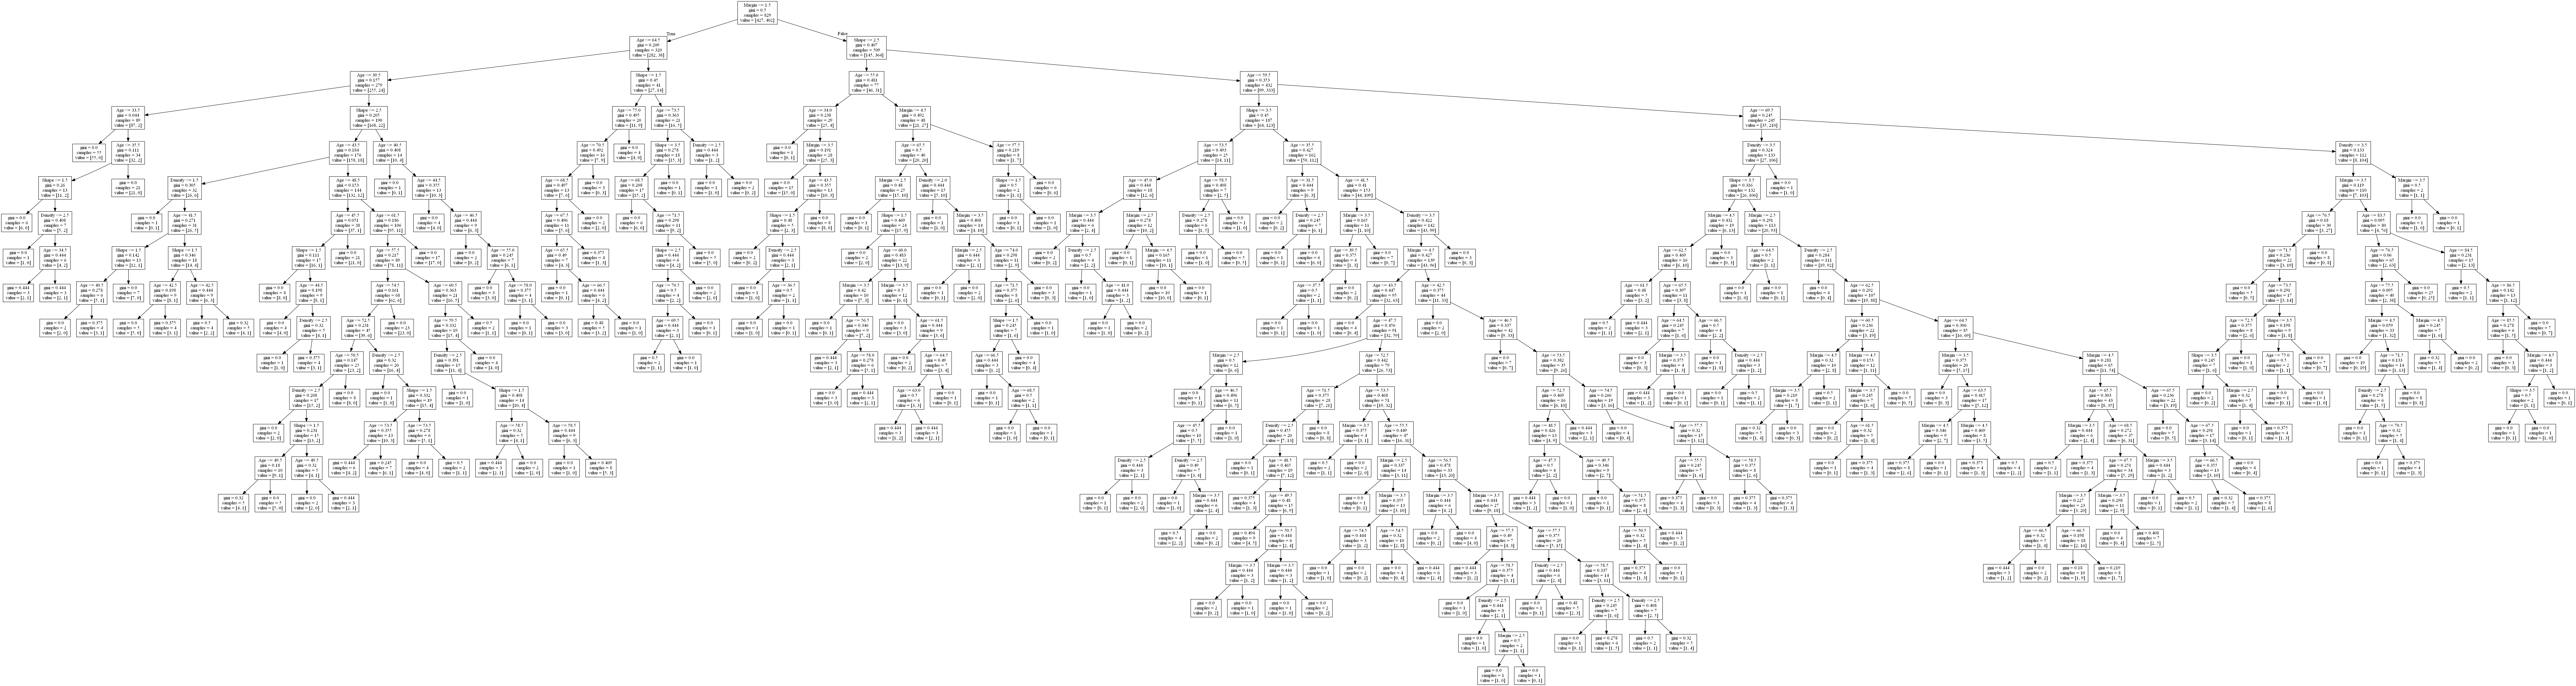

In [12]:
clf = classifier.fit(mammogram_x, mammogram_y)

mammogram_dot_data = StringIO()
tree.export_graphviz(clf, out_file=mammogram_dot_data, feature_names=mammogram_features)
graph = pydotplus.graph_from_dot_data(mammogram_dot_data.getvalue())
Image(graph.create_png())

The sheer complexity of the decision tree is an early indicator that a decision tree might not be the best model for this data set, but lets measure its accuracy anyway!

In [13]:
cv_scores = cross_val_score(clf, mammogram_x, mammogram_y, cv=10)
cv_scores.mean()

0.7370548395673286

The accuracy on our test data set isn't very good. Given our complex Decision Tree and Decisions Trees are prone to over-fitting, especially with a high ration of features to samples. Maybe its caused by overfitting.

Random Forests is a form of bootstrap aggregation ensemble learning, where random subsets of data are taken and fed into different versions of the model, utimately reducing variance. As a result, Random Forests are less prone to over-fitting.

In [14]:
def iterate_random_forest():
    for n in range(1,40):
        clf = RandomForestClassifier(n_estimators=n)
        cv_scores = cross_val_score(clf, mammogram_x, mammogram_y, cv=10)
        print(cv_scores.mean())
iterate_random_forest()

0.7248747603655039
0.729722723647202
0.7344993213271203
0.7514829352252215
0.7575665029455803
0.7478250983026181
0.7562455396498887
0.7538072149224073
0.7588003582273345
0.7514552985461007
0.7564201055091446
0.7636056420805172
0.7587132502133971
0.7538925737794384
0.7514549487147195
0.7647667324349664
0.7575367672781719
0.7527612190923975
0.751513020724011
0.7526748107412227
0.7563179547458125
0.7574937380182751
0.7756545345143641
0.7598886836544786
0.7647086604256749
0.7707334564739795
0.7647530890110967
0.7586982074640023
0.7599471054951514
0.753952045114255
0.7574786952688803
0.7647817751843611
0.7574643521822482
0.7623280578761038
0.7563462910876958
0.7587566293046751
0.7647376964303205
0.7526307319871821
0.7527171403383568


The similar results between the single Decision Tree and a Random Forest suggests that over-fitting is not the biggest contributor to low accuracy and that a Decision Tree just isn't the most suitable dataset for this type of data.

### Iris data

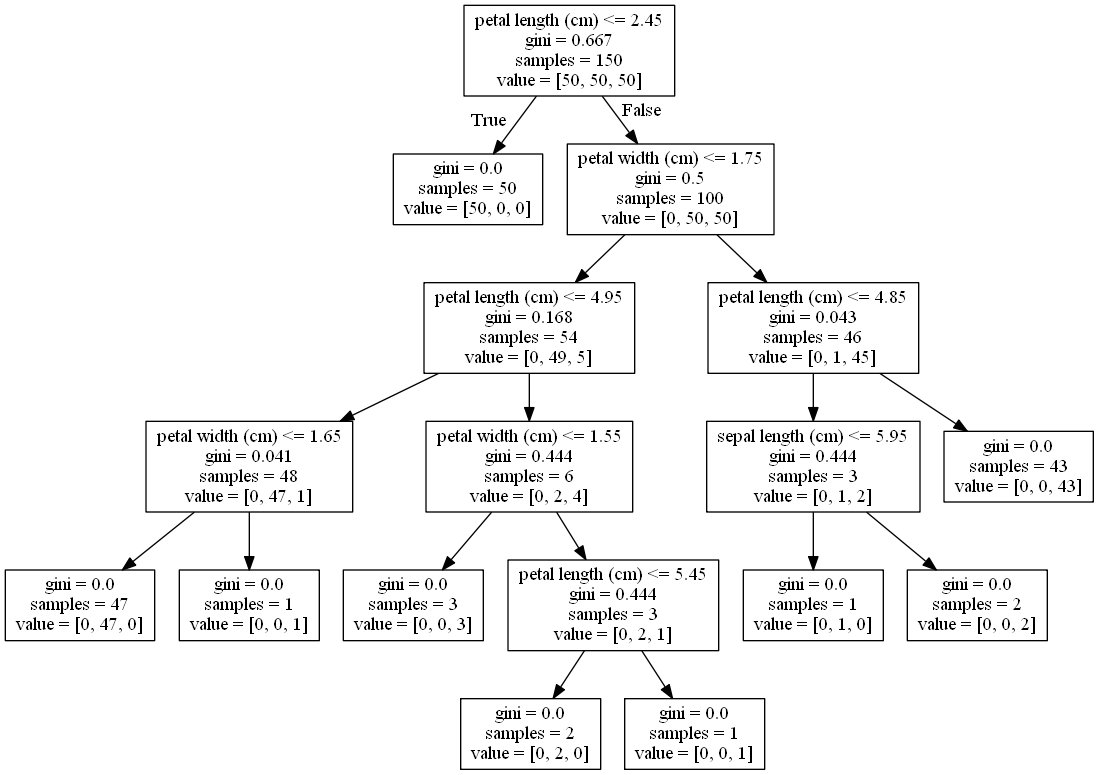

In [15]:
clf = classifier.fit(iris_x, iris_y)

iris_dot_data = StringIO()
tree.export_graphviz(clf, out_file=iris_dot_data, feature_names=iris_features)
graph = pydotplus.graph_from_dot_data(iris_dot_data.getvalue())
Image(graph.create_png())

The Iris decision tree looks much more manageable! Lets see how it performs.

In [16]:
cv_scores = cross_val_score(clf, iris_x, iris_y, cv=10)
cv_scores.mean()

0.96

This is an excellent result!

# SVM

In [17]:
from sklearn import svm

### Mammogram Data

In [18]:
svc = svm.SVC(kernel='linear', C=1.0, gamma='auto')
cv_scores = cross_val_score(svc, mammogram_x_scaled, mammogram_y, cv=10)
cv_scores.mean()

0.7963411135832529

In [19]:
svc = svm.SVC(kernel='rbf', C=1.0, gamma='auto')
cv_scores = cross_val_score(svc, mammogram_x_scaled, mammogram_y, cv=10)
cv_scores.mean()

0.8010445965044848

In [20]:
svc = svm.SVC(kernel='sigmoid', C=1.0, gamma='auto')
cv_scores = cross_val_score(svc, mammogram_x_scaled, mammogram_y, cv=10)
cv_scores.mean()

0.7432524523179828

In [21]:
svc = svm.SVC(kernel='poly', C=1.0, gamma='auto')
cv_scores = cross_val_score(svc, mammogram_x_scaled, mammogram_y, cv=10)
cv_scores.mean()

0.7926105117333446

None of the kernels with SVM appear to be any good at predicting mammogram severity! 

### Iris Data

In [22]:
svc = svm.SVC(kernel='linear', C=1.0, gamma='auto')
cv_scores = cross_val_score(svc, iris_x_scaled, iris_y, cv=10)
cv_scores.mean()

0.9666666666666668

In [23]:
svc = svm.SVC(kernel='rbf', C=1.0, gamma='auto')
cv_scores = cross_val_score(svc, iris_x_scaled, iris_y, cv=10)
cv_scores.mean()

0.9666666666666666

In [24]:
svc = svm.SVC(kernel='sigmoid', C=1.0, gamma='auto')
cv_scores = cross_val_score(svc, iris_x_scaled, iris_y, cv=10)
cv_scores.mean()

0.9

In [25]:
svc = svm.SVC(kernel='poly', C=1.0, gamma='auto')
cv_scores = cross_val_score(svc, iris_x_scaled, iris_y, cv=10)
cv_scores.mean()

0.9400000000000001

SVM appears to work better for the Iris dataset, probably because the dimensions are more separable and less noisey than the mammogram data.

# KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier

### Mammogram Data

In [27]:
def k_loop():
    for k in range(1, 10):
        knn = KNeighborsClassifier(n_neighbors=k)
        cv_scores = cross_val_score(knn, mammogram_x_scaled, mammogram_y, cv=10)
        print(k, cv_scores.mean())
k_loop()### Iris Data

1 0.7260208079705581
2 0.695782432867358
3 0.7562147544883365
4 0.7333217888977512
5 0.7733029679694388
6 0.7636206848299121
7 0.7926395477379902
8 0.7804741614541791
9 0.7901274085890602


### Iris Data

In [28]:
def k_loop():
    for k in range(1, 10):
        knn = KNeighborsClassifier(n_neighbors=k)
        cv_scores = cross_val_score(knn, iris_x_scaled, iris_y, cv=10)
        print(k, cv_scores.mean())
k_loop()

1 0.9533333333333334
2 0.9533333333333334
3 0.9533333333333334
4 0.9466666666666667
5 0.9533333333333334
6 0.9666666666666666
7 0.9533333333333334
8 0.9666666666666668
9 0.9533333333333334


Similar to SVM, we see that KNN works better for the Iris dataset further suggesting noisey Mammogram data to be a problem.

# Naive Bayes

In [29]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
NB = MultinomialNB()

### Mammogram Data

In [30]:
cv_scores = cross_val_score(NB, scaler.fit_transform(mammogram_x), mammogram_y, cv=10)
cv_scores.mean()

0.7842051131354688

### Iris Data

In [31]:
cv_scores = cross_val_score(NB, scaler.fit_transform(iris_x), iris_y, cv=10)
cv_scores.mean()

0.7866666666666667

# Regression

In [32]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()

from sklearn.linear_model import LogisticRegression
log = LogisticRegression(solver='liblinear', multi_class='auto')

### Mammogram Data

In [33]:
cv_scores = cross_val_score(lin, mammogram_x_scaled, mammogram_y, cv=10)
print('Linear - ', cv_scores.mean())

cv_scores = cross_val_score(log, mammogram_x_scaled, mammogram_y, cv=10)
print('Logistic - ', cv_scores.mean())

Linear -  0.4019607703137611
Logistic -  0.8072149224073997


### Iris Data

In [34]:
cv_scores = cross_val_score(lin, iris_x_scaled, iris_y, cv=10)
print('Linear - ', cv_scores.mean())

cv_scores = cross_val_score(log, iris_x_scaled, iris_y, cv=10)
print('Logistic - ', cv_scores.mean())

Linear -  0.15982002432211512
Logistic -  0.9


# Neural Networks

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow import keras
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

### Mammogram Data

In [36]:
def create_model():
    model = Sequential()
    model.add(Dense(6, kernel_initializer='normal', activation='relu', input_dim=4))
    model.add(Dense(6, activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
estimator = KerasClassifier(build_fn=create_model, epochs=100, verbose=0)
cv_scores = cross_val_score(estimator, mammogram_x_scaled, mammogram_y, cv=10)
cv_scores.mean()

### Iris Data

The Iris dataset labels are not binary by nature and requires different Neural Net layers, especially the categorisation layer at the output. First we need to one-hot encode the 3 different label classes. We also add a 3 neuron output layer corresponding to our 3 class one-hot encoded label set

In [ ]:
def create_model():
    model = Sequential()
    model.add(Dense(24, kernel_initializer='normal', activation='relu', input_dim=4))
    model.add(Dropout(0.2))
    model.add(Dense(12, activation='relu'))
    model.add(Dense(3, kernel_initializer='normal', activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
iris_y_encoded = keras.utils.to_categorical(iris_y, 3)
estimator = KerasClassifier(build_fn=create_model, epochs=100, verbose=0)
cv_scores = cross_val_score(estimator, iris_x_scaled, iris_y_encoded, cv=10)
cv_scores.mean()

NN's aren't always the answers plus you need lots of data to train NNs properly